In [1]:
%pwd

'C:\\Sagar Study\\ML and Learning\\CP Sem-8\\Project-2-Overall\\nlu-project-prerocessing\\nlu-project-data\\notebooks'

In [2]:
%cd ..\data

C:\Sagar Study\ML and Learning\CP Sem-8\Project-2-Overall\nlu-project-prerocessing\nlu-project-data\data


In [3]:
%pwd

'C:\\Sagar Study\\ML and Learning\\CP Sem-8\\Project-2-Overall\\nlu-project-prerocessing\\nlu-project-data\\data'

In [5]:
import time 
import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

import warnings
warnings.filterwarnings("ignore")

In [6]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Load submission data 

In [8]:
# Load a sample data 
data = pd.read_csv("raw/submissions/sample_submission.csv")

# Analysis

### Observations: 
   - The text column is mostly empty. It can be dropped.
   - We can even remove "flair" AND "permalink" columns from our dataframe 

In [9]:
data.head()

,post_id,title,author,score,publish_date,num_comms,text
0,7neoy8,"UK: Is it just me, or do men hog space in your...",furchfur,77,2018-01-01 11:17:25,28,NaN
1,7nfje4,My mom is a domestic abuser but she got my dad...,and-so-on,99,2018-01-01 15:09:12,21,My mom has progressively gotten very abusive t...
2,7nfydm,"My Mother sued me, based on false allegations,...",DerwahreKerder,71,2018-01-01 16:31:04,67,I grew up with a one year older brother in a s...
3,7nho5z,German Police Boss Slams NYE 'Safe Zones' for ...,DougDante,193,2018-01-01 21:13:58,68,NaN
4,7ni983,A textbook example of how feminists censor fac...,EricAllonde,81,2018-01-01 22:52:33,42,NaN


**Observations**
*  It seems that the no. of observations having "num_comms" >= 200 are few. We eon't consider those converations as they are quite rare and don't represent the source's popularity. 

In [10]:
# Display basic data stats 
def displayBasicStats(df: DataFrame):
    
    # look at data head 
    display(df.head())

    # look a shape of data
    display(df.shape)

    # look at data types. Ideally look at all rows. Only look at first five here for minimal output.
    display(df.iloc[:5,:5].dtypes)

    # see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
    display(df.iloc[:5,:5].isnull().any())

    # display descriptive statistics
    display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))


In [11]:
display(data)

,post_id,title,author,score,publish_date,num_comms,text
0,7neoy8,"UK: Is it just me, or do men hog space in your...",furchfur,77,2018-01-01 11:17:25,28,NaN
1,7nfje4,My mom is a domestic abuser but she got my dad...,and-so-on,99,2018-01-01 15:09:12,21,My mom has progressively gotten very abusive t...
2,7nfydm,"My Mother sued me, based on false allegations,...",DerwahreKerder,71,2018-01-01 16:31:04,67,I grew up with a one year older brother in a s...
3,7nho5z,German Police Boss Slams NYE 'Safe Zones' for ...,DougDante,193,2018-01-01 21:13:58,68,NaN
4,7ni983,A textbook example of how feminists censor fac...,EricAllonde,81,2018-01-01 22:52:33,42,NaN
...,...,...,...,...,...,...,...
3688,ab1u8m,"What would happen, if (by law) women were comp...",JackIsThicc,1,2018-12-31 00:46:53,38,"Not only would they get the benefits, but also..."
3689,ab374x,x Feminist Amy Siskind Tries to Get a Professo...,Mens-Advocate,1,2018-12-31 03:28:11,23,NaN
3690,ab3m9t,Aquaman is a big step in the right direction. ...,Otter_Actual,1,2018-12-31 04:20:56,26,"I know this isn't the movie subreddit, but I f..."
3691,ab68o5,Men don't get anywhere near the support for se...,IchMagThaiReis,1,2018-12-31 11:11:09,80,NaN


In [12]:
data = data.set_index("post_id")

<AxesSubplot:xlabel='num_comms', ylabel='Count'>

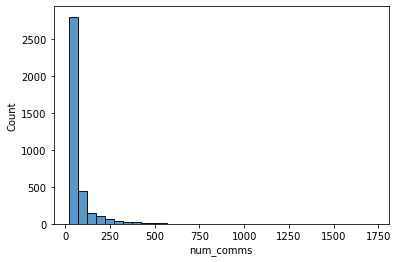

In [13]:
data = data[data["num_comms"] > 0]
sns.histplot(data["num_comms"], binwidth = 50)

There are almost negligible submissions with no. of comments >= 250 

<AxesSubplot:xlabel='num_comms', ylabel='Count'>

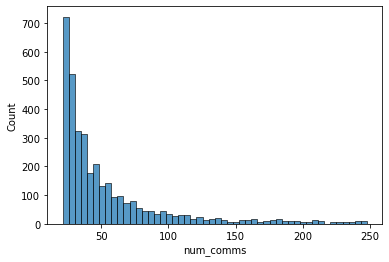

In [14]:
data = data[data["num_comms"] <= 250]
sns.histplot(data["num_comms"])

We filter for submissions with less than or equal to 100 comments

<AxesSubplot:xlabel='num_comms', ylabel='Count'>

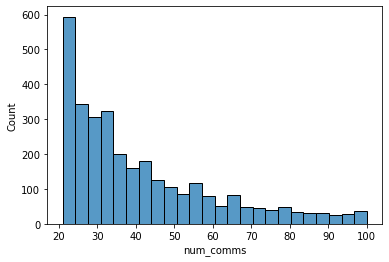

In [15]:
data = data[data["num_comms"] <= 100]
sns.histplot(data["num_comms"])

Now we have a appreciable distribution. We can take the median count and proceed 

In [16]:
def data_sample(median_num_of_comms: float, df: DataFrame) -> DataFrame:
    """
    Returns: The sub-sampled dataframe consisting of 200 submissions 
    
    """
    left_bound = median_num_of_comms - 2 * np.std(data["num_comms"])    
    right_bound = median_num_of_comms  + 2 * np.std(data["num_comms"])
    
    left_bound = round(left_bound/10) * 10      # round off left and right bounds to the nearest 10 
    right_bound = round(right_bound/10) * 10 
    
    if left_bound < 0:
        left_bound = 0
        

    data_sample = df[(df["num_comms"] >= left_bound) & (df["num_comms"] <= right_bound)]
    data_left_bound = data_sample[data_sample["num_comms"] <= median_num_of_comms]
    data_right_bound = data_sample[data_sample["num_comms"] >= median_num_of_comms]
    
    return data_left_bound, data_right_bound 

def sample_sub_ids(data_left_bound: DataFrame, data_right_bound: DataFrame):
    """
    Returns: A list of randomly sampled submission Ids from left and right bounds 
    
    """
    
    random_left_ids = list(np.random.choice(data_left_bound.index, size = 100, replace = False))
    random_right_ids = list(np.random.choice(data_right_bound.index, size = 100, replace = False))
                        
    random_sub_ids = []
    random_sub_ids = random_left_ids + random_right_ids 
    return random_sub_ids 

In [17]:
data_left, data_right = data_sample(data["num_comms"].quantile(0.5), data)
random_sub_ids = sample_sub_ids(data_left, data_right)

In [18]:
data_sub_sample = data.loc[random_sub_ids]  # Select the dataset sub-sample for the submission IDs in random_sub_ids

In [19]:
def modify_cols(df: DataFrame): 
    df["reply_to"] = "None"
    df["conversation_id"] = df.index
    
    # Rename some column names as per CONVOKIT requirement 
    rename_cols = {"title": "text", "author": "speaker", "publish_date": "timestamp"}
    df.rename(columns = rename_cols, inplace = True)
    df["reply_to"] = "None" 
    
    return df 

In [21]:
data_sub_sample = modify_cols(data_sub_sample)

In [22]:
display(data_sub_sample)

,text,speaker,score,timestamp,num_comms,text,reply_to,conversation_id
post_id,,,,,,,,
8sskc5,Should I say anything?,J3NA,45,2018-06-21 15:01:34,30,Hi!\n\nMy son's school has a document manager ...,None,8sskc5
9bias7,Yet Another Report Shows Teen Girls Are More P...,Imnotmrabut,242,2018-08-30 10:02:17,26,NaN,None,9bias7
8ampfv,Sexual assault on men is a-okay for many!,WTFOMGBBQ,65,2018-04-08 01:17:57,23,"Today, on a closed group nutrition/diet page o...",None,8ampfv
982frn,It isn't erect because we are aroused.,hustlemuscleracing,70,2018-08-17 13:52:53,32,"Okay, I need to get something off my chest tha...",None,982frn
97iwn4,Noticed this in my news feed. Suffice to say I...,AngryCockOfJustice,6,2018-08-15 14:56:03,22,NaN,None,97iwn4
...,...,...,...,...,...,...,...,...
a8fmg0,2 boys almost bled to death in botched circumc...,ShaidarHaran2,1,2018-12-21 23:28:47,37,NaN,None,a8fmg0
7ni983,A textbook example of how feminists censor fac...,EricAllonde,81,2018-01-01 22:52:33,42,NaN,None,7ni983
95c53g,"""imagine believing misandry is a real thing""",jonese1234,290,2018-08-07 14:32:49,45,NaN,None,95c53g


In [23]:
# Save the dataframe 
data.to_csv("processed/submissions/sample_data.csv")